# ImageNet 데이터셋 검증 
> InceptionV3

### import

In [22]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.9.0


#### GPU 사용여부

In [23]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [24]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = "D:/IMAGENET/data_dir/"

write_dir = "D:/IMAGENET/write_dir/"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# InceptionV3

### Preprocess for InceptionV3

image shape: (1, 299, 299, 3) label: ['European fire salamander']


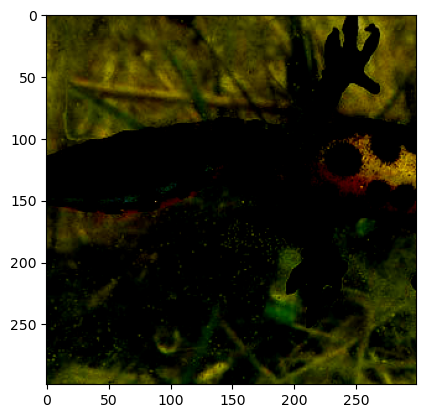

image shape: (1, 299, 299, 3) label: ['mushroom']


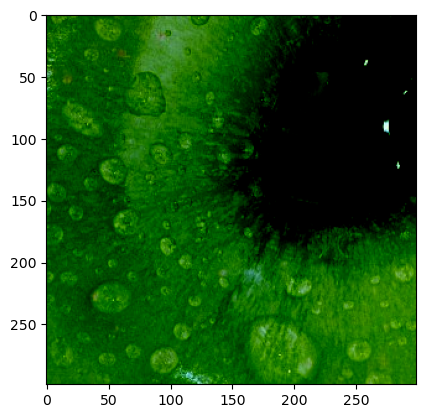

In [25]:
# Preprocess the images
def resize_with_crop_InceptionV3(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 299, 299)
    i = tf.keras.applications.inception_v3.preprocess_input(i)
    return (i, label)

ds_InceptionV3 = ds.map(resize_with_crop_InceptionV3)

# Plot a few
ds_InceptionV3 = ds_InceptionV3.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_InceptionV3.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

# Original weight

## Evaluation

In [26]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights='imagenet')
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_391 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_391 (Batch  (None, 149, 149, 32  96         ['conv2d_391[0][0]']             
 Normalization)                 )                                                      

 conv2d_402 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_19[0][0]']   
                                                                                                  
 batch_normalization_396 (Batch  (None, 35, 35, 64)  192         ['conv2d_396[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_398 (Batch  (None, 35, 35, 64)  192         ['conv2d_398[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_401 (Batch  (None, 35, 35, 96)  288         ['conv2d_401[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_413 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_413 (Batch  (None, 35, 35, 64)  192         ['conv2d_413[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_413 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_413[0][0]']
                                                                                                  
 conv2d_411 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_41

                                                                                                  
 activation_420 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_420[0][0]']
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_417[0][0]',         
                                                                  'activation_420[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_42

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_421[0][0]',         
                                                                  'activation_424[0][0]',         
                                                                  'activation_429[0][0]',         
                                                                  'activation_430[0][0]']         
                                                                                                  
 conv2d_435 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_435 (Batch  (None, 17, 17, 160)  480        ['conv2d_435[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_445 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_445 (Batch  (None, 17, 17, 160)  480        ['conv2d_445[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_445 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_445[0][0]']
                                                                                                  
 conv2d_446 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_445[0][0]']         
                                                                                                  
 batch_normalization_446 (Batch  (None, 17, 17, 160)  480        ['conv2d_446[0][0]']             
 Normaliza

 activation_455 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_455[0][0]']
                                                                                                  
 conv2d_456 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_455[0][0]']         
                                                                                                  
 batch_normalization_456 (Batch  (None, 17, 17, 192)  576        ['conv2d_456[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_456 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_456[0][0]']
                                                                                                  
 conv2d_452 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_464 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_464[0][0]']
                                                                                                  
 conv2d_461 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_465 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_464[0][0]']         
                                                                                                  
 batch_normalization_461 (Batch  (None, 17, 17, 192)  576        ['conv2d_461[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_475 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_26[0][0]']   
                                                                                                  
 batch_normalization_467 (Batch  (None, 8, 8, 320)   960         ['conv2d_467[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_469 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_469[0][0]']
                                                                                                  
 activation_470 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_470[0][0]']
          

                                                                                                  
 activation_478 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_478[0][0]']
                                                                                                  
 activation_479 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_479[0][0]']
                                                                                                  
 activation_482 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_482[0][0]']
                                                                                                  
 activation_483 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_483[0][0]']
                                                                                                  
 batch_normalization_484 (Batch  (None, 8, 8, 192)   576         ['conv2d_484[0][0]']             
 Normaliza

In [27]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 1185s 24ms/step - loss: 1.0378 - accuracy: 0.7635


In [28]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377652645111084, 'accuracy': 0.7634999752044678}


# 30bit weight (zero to last 2-bit)

## Evaluation

In [29]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_30bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_485 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_485 (Batch  (None, 149, 149, 32  96         ['conv2d_485[0][0]']             
 Normalization)                 )                                                      

 conv2d_496 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_28[0][0]']   
                                                                                                  
 batch_normalization_490 (Batch  (None, 35, 35, 64)  192         ['conv2d_490[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_492 (Batch  (None, 35, 35, 64)  192         ['conv2d_492[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_495 (Batch  (None, 35, 35, 96)  288         ['conv2d_495[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_507 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_507 (Batch  (None, 35, 35, 64)  192         ['conv2d_507[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_507 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_507[0][0]']
                                                                                                  
 conv2d_505 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_50

                                                                                                  
 activation_514 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_514[0][0]']
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_511[0][0]',         
                                                                  'activation_514[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
                                                                                                  
 conv2d_51

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_515[0][0]',         
                                                                  'activation_518[0][0]',         
                                                                  'activation_523[0][0]',         
                                                                  'activation_524[0][0]']         
                                                                                                  
 conv2d_529 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_529 (Batch  (None, 17, 17, 160)  480        ['conv2d_529[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_539 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_539 (Batch  (None, 17, 17, 160)  480        ['conv2d_539[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_539 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_539[0][0]']
                                                                                                  
 conv2d_540 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_539[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 17, 17, 160)  480        ['conv2d_540[0][0]']             
 Normaliza

 activation_549 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_549[0][0]']
                                                                                                  
 conv2d_550 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_549[0][0]']         
                                                                                                  
 batch_normalization_550 (Batch  (None, 17, 17, 192)  576        ['conv2d_550[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_550 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_550[0][0]']
                                                                                                  
 conv2d_546 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_558 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_558[0][0]']
                                                                                                  
 conv2d_555 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_559 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_558[0][0]']         
                                                                                                  
 batch_normalization_555 (Batch  (None, 17, 17, 192)  576        ['conv2d_555[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_569 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_35[0][0]']   
                                                                                                  
 batch_normalization_561 (Batch  (None, 8, 8, 320)   960         ['conv2d_561[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_563 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_563[0][0]']
                                                                                                  
 activation_564 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_564[0][0]']
          

                                                                                                  
 activation_572 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_572[0][0]']
                                                                                                  
 activation_573 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_573[0][0]']
                                                                                                  
 activation_576 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_576[0][0]']
                                                                                                  
 activation_577 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_577[0][0]']
                                                                                                  
 batch_normalization_578 (Batch  (None, 8, 8, 192)   576         ['conv2d_578[0][0]']             
 Normaliza

In [30]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 855s 17ms/step - loss: 1.0378 - accuracy: 0.7635


In [31]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.037756323814392, 'accuracy': 0.7634599804878235}


# 28bit weight (zero to 4-bit)

## Evaluation

In [32]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_30bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_579 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_579 (Batch  (None, 149, 149, 32  96         ['conv2d_579[0][0]']             
 Normalization)                 )                                                      

 conv2d_590 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_37[0][0]']   
                                                                                                  
 batch_normalization_584 (Batch  (None, 35, 35, 64)  192         ['conv2d_584[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_586 (Batch  (None, 35, 35, 64)  192         ['conv2d_586[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_589 (Batch  (None, 35, 35, 96)  288         ['conv2d_589[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_601 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_601 (Batch  (None, 35, 35, 64)  192         ['conv2d_601[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_601 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_601[0][0]']
                                                                                                  
 conv2d_599 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_60

                                                                                                  
 activation_608 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_608[0][0]']
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_605[0][0]',         
                                                                  'activation_608[0][0]',         
                                                                  'max_pooling2d_22[0][0]']       
                                                                                                  
 conv2d_61

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_609[0][0]',         
                                                                  'activation_612[0][0]',         
                                                                  'activation_617[0][0]',         
                                                                  'activation_618[0][0]']         
                                                                                                  
 conv2d_623 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_623 (Batch  (None, 17, 17, 160)  480        ['conv2d_623[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_633 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_633 (Batch  (None, 17, 17, 160)  480        ['conv2d_633[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_633 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_633[0][0]']
                                                                                                  
 conv2d_634 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_633[0][0]']         
                                                                                                  
 batch_normalization_634 (Batch  (None, 17, 17, 160)  480        ['conv2d_634[0][0]']             
 Normaliza

 activation_643 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_643[0][0]']
                                                                                                  
 conv2d_644 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_643[0][0]']         
                                                                                                  
 batch_normalization_644 (Batch  (None, 17, 17, 192)  576        ['conv2d_644[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_644 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_644[0][0]']
                                                                                                  
 conv2d_640 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_652 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_652[0][0]']
                                                                                                  
 conv2d_649 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_653 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_652[0][0]']         
                                                                                                  
 batch_normalization_649 (Batch  (None, 17, 17, 192)  576        ['conv2d_649[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_663 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_44[0][0]']   
                                                                                                  
 batch_normalization_655 (Batch  (None, 8, 8, 320)   960         ['conv2d_655[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_657 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_657[0][0]']
                                                                                                  
 activation_658 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_658[0][0]']
          

                                                                                                  
 activation_666 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_666[0][0]']
                                                                                                  
 activation_667 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_667[0][0]']
                                                                                                  
 activation_670 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_670[0][0]']
                                                                                                  
 activation_671 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_671[0][0]']
                                                                                                  
 batch_normalization_672 (Batch  (None, 8, 8, 192)   576         ['conv2d_672[0][0]']             
 Normaliza

In [33]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 827s 16ms/step - loss: 1.0378 - accuracy: 0.7635


In [34]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377562046051025, 'accuracy': 0.7634599804878235}


# 26bit weight (zero to 6-bit)

## Evaluation

In [35]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_26bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_673 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_673 (Batch  (None, 149, 149, 32  96         ['conv2d_673[0][0]']             
 Normalization)                 )                                                      

 conv2d_684 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_46[0][0]']   
                                                                                                  
 batch_normalization_678 (Batch  (None, 35, 35, 64)  192         ['conv2d_678[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_680 (Batch  (None, 35, 35, 64)  192         ['conv2d_680[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_683 (Batch  (None, 35, 35, 96)  288         ['conv2d_683[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_695 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_695 (Batch  (None, 35, 35, 64)  192         ['conv2d_695[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_695 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_695[0][0]']
                                                                                                  
 conv2d_693 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_69

                                                                                                  
 activation_702 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_702[0][0]']
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_699[0][0]',         
                                                                  'activation_702[0][0]',         
                                                                  'max_pooling2d_26[0][0]']       
                                                                                                  
 conv2d_70

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_703[0][0]',         
                                                                  'activation_706[0][0]',         
                                                                  'activation_711[0][0]',         
                                                                  'activation_712[0][0]']         
                                                                                                  
 conv2d_717 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_717 (Batch  (None, 17, 17, 160)  480        ['conv2d_717[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_727 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_727 (Batch  (None, 17, 17, 160)  480        ['conv2d_727[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_727 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_727[0][0]']
                                                                                                  
 conv2d_728 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_727[0][0]']         
                                                                                                  
 batch_normalization_728 (Batch  (None, 17, 17, 160)  480        ['conv2d_728[0][0]']             
 Normaliza

 activation_737 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_737[0][0]']
                                                                                                  
 conv2d_738 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_737[0][0]']         
                                                                                                  
 batch_normalization_738 (Batch  (None, 17, 17, 192)  576        ['conv2d_738[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_738 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_738[0][0]']
                                                                                                  
 conv2d_734 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_746 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_746[0][0]']
                                                                                                  
 conv2d_743 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_747 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_746[0][0]']         
                                                                                                  
 batch_normalization_743 (Batch  (None, 17, 17, 192)  576        ['conv2d_743[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_757 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_53[0][0]']   
                                                                                                  
 batch_normalization_749 (Batch  (None, 8, 8, 320)   960         ['conv2d_749[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_751 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_751[0][0]']
                                                                                                  
 activation_752 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_752[0][0]']
          

                                                                                                  
 activation_760 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_760[0][0]']
                                                                                                  
 activation_761 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_761[0][0]']
                                                                                                  
 activation_764 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_764[0][0]']
                                                                                                  
 activation_765 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_765[0][0]']
                                                                                                  
 batch_normalization_766 (Batch  (None, 8, 8, 192)   576         ['conv2d_766[0][0]']             
 Normaliza

In [36]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 834s 17ms/step - loss: 1.0378 - accuracy: 0.7635


In [37]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377683639526367, 'accuracy': 0.763480007648468}


# 24bit weight (zero to 8-bit)

## Evaluation

In [38]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_24bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_767 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_767 (Batch  (None, 149, 149, 32  96         ['conv2d_767[0][0]']             
 Normalization)                 )                                                      

 conv2d_778 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_55[0][0]']   
                                                                                                  
 batch_normalization_772 (Batch  (None, 35, 35, 64)  192         ['conv2d_772[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_774 (Batch  (None, 35, 35, 64)  192         ['conv2d_774[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_777 (Batch  (None, 35, 35, 96)  288         ['conv2d_777[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_789 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_789 (Batch  (None, 35, 35, 64)  192         ['conv2d_789[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_789 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_789[0][0]']
                                                                                                  
 conv2d_787 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_79

                                                                                                  
 activation_796 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_796[0][0]']
                                                                                                  
 max_pooling2d_30 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_793[0][0]',         
                                                                  'activation_796[0][0]',         
                                                                  'max_pooling2d_30[0][0]']       
                                                                                                  
 conv2d_80

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_797[0][0]',         
                                                                  'activation_800[0][0]',         
                                                                  'activation_805[0][0]',         
                                                                  'activation_806[0][0]']         
                                                                                                  
 conv2d_811 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_811 (Batch  (None, 17, 17, 160)  480        ['conv2d_811[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_821 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_821 (Batch  (None, 17, 17, 160)  480        ['conv2d_821[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_821 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_821[0][0]']
                                                                                                  
 conv2d_822 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_821[0][0]']         
                                                                                                  
 batch_normalization_822 (Batch  (None, 17, 17, 160)  480        ['conv2d_822[0][0]']             
 Normaliza

 activation_831 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_831[0][0]']
                                                                                                  
 conv2d_832 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_831[0][0]']         
                                                                                                  
 batch_normalization_832 (Batch  (None, 17, 17, 192)  576        ['conv2d_832[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_832 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_832[0][0]']
                                                                                                  
 conv2d_828 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_840 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_840[0][0]']
                                                                                                  
 conv2d_837 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_841 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_840[0][0]']         
                                                                                                  
 batch_normalization_837 (Batch  (None, 17, 17, 192)  576        ['conv2d_837[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_851 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_62[0][0]']   
                                                                                                  
 batch_normalization_843 (Batch  (None, 8, 8, 320)   960         ['conv2d_843[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_845 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_845[0][0]']
                                                                                                  
 activation_846 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_846[0][0]']
          

                                                                                                  
 activation_854 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_854[0][0]']
                                                                                                  
 activation_855 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_855[0][0]']
                                                                                                  
 activation_858 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_858[0][0]']
                                                                                                  
 activation_859 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_859[0][0]']
                                                                                                  
 batch_normalization_860 (Batch  (None, 8, 8, 192)   576         ['conv2d_860[0][0]']             
 Normaliza

In [39]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 808s 16ms/step - loss: 1.0378 - accuracy: 0.7635


In [40]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377745628356934, 'accuracy': 0.763480007648468}


# 22bit weight (zero to 10-bit)

## Evaluation

In [41]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_22bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_861 (Conv2D)            (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_861 (Batch  (None, 149, 149, 32  96         ['conv2d_861[0][0]']             
 Normalization)                 )                                                      

 conv2d_872 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_64[0][0]']   
                                                                                                  
 batch_normalization_866 (Batch  (None, 35, 35, 64)  192         ['conv2d_866[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_868 (Batch  (None, 35, 35, 64)  192         ['conv2d_868[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_871 (Batch  (None, 35, 35, 96)  288         ['conv2d_871[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_883 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_883 (Batch  (None, 35, 35, 64)  192         ['conv2d_883[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_883 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_883[0][0]']
                                                                                                  
 conv2d_881 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_88

                                                                                                  
 activation_890 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_890[0][0]']
                                                                                                  
 max_pooling2d_34 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_887[0][0]',         
                                                                  'activation_890[0][0]',         
                                                                  'max_pooling2d_34[0][0]']       
                                                                                                  
 conv2d_89

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_891[0][0]',         
                                                                  'activation_894[0][0]',         
                                                                  'activation_899[0][0]',         
                                                                  'activation_900[0][0]']         
                                                                                                  
 conv2d_905 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_905 (Batch  (None, 17, 17, 160)  480        ['conv2d_905[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_915 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_915 (Batch  (None, 17, 17, 160)  480        ['conv2d_915[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_915 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_915[0][0]']
                                                                                                  
 conv2d_916 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_915[0][0]']         
                                                                                                  
 batch_normalization_916 (Batch  (None, 17, 17, 160)  480        ['conv2d_916[0][0]']             
 Normaliza

 activation_925 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_925[0][0]']
                                                                                                  
 conv2d_926 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_925[0][0]']         
                                                                                                  
 batch_normalization_926 (Batch  (None, 17, 17, 192)  576        ['conv2d_926[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_926 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_926[0][0]']
                                                                                                  
 conv2d_922 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_934 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_934[0][0]']
                                                                                                  
 conv2d_931 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_935 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_934[0][0]']         
                                                                                                  
 batch_normalization_931 (Batch  (None, 17, 17, 192)  576        ['conv2d_931[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_945 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_71[0][0]']   
                                                                                                  
 batch_normalization_937 (Batch  (None, 8, 8, 320)   960         ['conv2d_937[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_939 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_939[0][0]']
                                                                                                  
 activation_940 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_940[0][0]']
          

                                                                                                  
 activation_948 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_948[0][0]']
                                                                                                  
 activation_949 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_949[0][0]']
                                                                                                  
 activation_952 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_952[0][0]']
                                                                                                  
 activation_953 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_953[0][0]']
                                                                                                  
 batch_normalization_954 (Batch  (None, 8, 8, 192)   576         ['conv2d_954[0][0]']             
 Normaliza

In [42]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 814s 16ms/step - loss: 1.0377 - accuracy: 0.7635


In [43]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.037686824798584, 'accuracy': 0.7635400295257568}


# 20bit weight (zero to 12-bit)

## Evaluation

In [44]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_20bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_955 (Conv2D)            (None, 149, 149, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_955 (Batch  (None, 149, 149, 32  96         ['conv2d_955[0][0]']             
 Normalization)                 )                                                      

 conv2d_966 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_73[0][0]']   
                                                                                                  
 batch_normalization_960 (Batch  (None, 35, 35, 64)  192         ['conv2d_960[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_962 (Batch  (None, 35, 35, 64)  192         ['conv2d_962[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_965 (Batch  (None, 35, 35, 96)  288         ['conv2d_965[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_977 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_977 (Batch  (None, 35, 35, 64)  192         ['conv2d_977[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_977 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_977[0][0]']
                                                                                                  
 conv2d_975 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_97

                                                                                                  
 activation_984 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_984[0][0]']
                                                                                                  
 max_pooling2d_38 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_981[0][0]',         
                                                                  'activation_984[0][0]',         
                                                                  'max_pooling2d_38[0][0]']       
                                                                                                  
 conv2d_98

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_985[0][0]',         
                                                                  'activation_988[0][0]',         
                                                                  'activation_993[0][0]',         
                                                                  'activation_994[0][0]']         
                                                                                                  
 conv2d_999 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_999 (Batch  (None, 17, 17, 160)  480        ['conv2d_999[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 mixed5 (Concatenate)           (None, 17, 17, 768)  0           ['activation_995[0][0]',         
                                                                  'activation_998[0][0]',         
                                                                  'activation_1003[0][0]',        
                                                                  'activation_1004[0][0]']        
                                                                                                  
 conv2d_1009 (Conv2D)           (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_1009 (Batc  (None, 17, 17, 160)  480        ['conv2d_1009[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                                                 ]                                
                                                                                                  
 activation_1014 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1014[0][0]'
                                                                 ]                                
                                                                                                  
 mixed6 (Concatenate)           (None, 17, 17, 768)  0           ['activation_1005[0][0]',        
                                                                  'activation_1008[0][0]',        
                                                                  'activation_1013[0][0]',        
                                                                  'activation_1014[0][0]']        
                                                                                                  
 conv2d_10

                                                                                                  
 activation_1018 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1018[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1023 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1023[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1024 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1024[0][0]'
                                                                 ]                                
                                                                                                  
 mixed7 (C

 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1036 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1036[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1032 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1032[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1036 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1036[0][0]'
                                                                 ]                                
          

 conv2d_1045 (Conv2D)           (None, 8, 8, 384)    1548288     ['activation_1044[0][0]']        
                                                                                                  
 batch_normalization_1041 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1041[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1045 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1045[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1041 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1041[0][0]'
                                                                 ]                                
          

__________________________________________________________________________________________________


In [45]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 837s 17ms/step - loss: 1.0376 - accuracy: 0.7636


In [46]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0376179218292236, 'accuracy': 0.7635599970817566}


# 18bit weight (zero to 14-bit)

## Evaluation

In [47]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_18bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1049 (Conv2D)           (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1049 (Batc  (None, 149, 149, 32  96         ['conv2d_1049[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1056 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1055[0][0]']        
                                                                                                  
 conv2d_1059 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1058[0][0]']        
                                                                                                  
 conv2d_1060 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_82[0][0]']   
                                                                                                  
 batch_normalization_1054 (Batc  (None, 35, 35, 64)  192         ['conv2d_1054[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1061 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1061[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1063 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1063[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1066 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1066[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1067 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1067[0][0]'
          

 batch_normalization_1076 (Batc  (None, 35, 35, 64)  192         ['conv2d_1076[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1076 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1076[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1077 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1076[0][0]']        
                                                                                                  
 batch_normalization_1077 (Batc  (None, 35, 35, 96)  288         ['conv2d_1077[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_85 (AverageP  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_1079 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1082 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1081[0][0]']        
                                                                                                  
 conv2d_1087 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1086[0][0]']        
          

                                                                                                  
 activation_1091 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1091[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1096 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1096[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_86 (AverageP  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_10

 batch_normalization_1101 (Batc  (None, 17, 17, 160)  480        ['conv2d_1101[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1106 (Batc  (None, 17, 17, 160)  480        ['conv2d_1106[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1101 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1101[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1106 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1106[0][0]'
          

                                                                                                  
 conv2d_1111 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1110[0][0]']        
                                                                                                  
 conv2d_1116 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1115[0][0]']        
                                                                                                  
 batch_normalization_1111 (Batc  (None, 17, 17, 192)  576        ['conv2d_1111[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1116 (Batc  (None, 17, 17, 192)  576        ['conv2d_1116[0][0]']            
 hNormalization)                                                                                  
          

 activation_1119 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1119[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1123 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1123[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1120 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1119[0][0]']        
                                                                                                  
 conv2d_1124 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1123[0][0]']        
                                                                                                  
 batch_nor

 activation_1127 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1127[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1128 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1128[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1131 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1131[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1132 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1132[0][0]'
          

 batch_normalization_1134 (Batc  (None, 8, 8, 320)   960         ['conv2d_1134[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1136 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1136[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1137 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1137[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1140 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1140[0][0]'
          

In [48]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 819s 16ms/step - loss: 1.0386 - accuracy: 0.7634


In [49]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0385544300079346, 'accuracy': 0.7634000182151794}


# 16bit weight (zero to 16-bit) - half

## Evaluation

In [50]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_16bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1143 (Conv2D)           (None, 149, 149, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1143 (Batc  (None, 149, 149, 32  96         ['conv2d_1143[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1150 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1149[0][0]']        
                                                                                                  
 conv2d_1153 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1152[0][0]']        
                                                                                                  
 conv2d_1154 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_91[0][0]']   
                                                                                                  
 batch_normalization_1148 (Batc  (None, 35, 35, 64)  192         ['conv2d_1148[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1155 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1155[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1157 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1157[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1160 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1160[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1161 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1161[0][0]'
          

 batch_normalization_1170 (Batc  (None, 35, 35, 64)  192         ['conv2d_1170[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1170 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1170[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1171 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1170[0][0]']        
                                                                                                  
 batch_normalization_1171 (Batc  (None, 35, 35, 96)  288         ['conv2d_1171[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_94 (AverageP  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_1173 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1176 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1175[0][0]']        
                                                                                                  
 conv2d_1181 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1180[0][0]']        
          

                                                                                                  
 activation_1185 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1185[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1190 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1190[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_95 (AverageP  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_11

 batch_normalization_1195 (Batc  (None, 17, 17, 160)  480        ['conv2d_1195[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1200 (Batc  (None, 17, 17, 160)  480        ['conv2d_1200[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1195 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1195[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1200 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1200[0][0]'
          

                                                                                                  
 conv2d_1205 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1204[0][0]']        
                                                                                                  
 conv2d_1210 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1209[0][0]']        
                                                                                                  
 batch_normalization_1205 (Batc  (None, 17, 17, 192)  576        ['conv2d_1205[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1210 (Batc  (None, 17, 17, 192)  576        ['conv2d_1210[0][0]']            
 hNormalization)                                                                                  
          

 activation_1213 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1213[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1217 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1217[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1214 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1213[0][0]']        
                                                                                                  
 conv2d_1218 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1217[0][0]']        
                                                                                                  
 batch_nor

 activation_1221 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1221[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1222 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1222[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1225 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1225[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1226 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1226[0][0]'
          

 batch_normalization_1228 (Batc  (None, 8, 8, 320)   960         ['conv2d_1228[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1230 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1230[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1231 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1231[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1234 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1234[0][0]'
          

In [51]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 832s 17ms/step - loss: 1.0378 - accuracy: 0.7629


In [52]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377589464187622, 'accuracy': 0.7629200220108032}


# 14bit weight (zero to 18-bit)

## Evaluation

In [53]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_14bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1237 (Conv2D)           (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1237 (Batc  (None, 149, 149, 32  96         ['conv2d_1237[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1244 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1243[0][0]']        
                                                                                                  
 conv2d_1247 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1246[0][0]']        
                                                                                                  
 conv2d_1248 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_100[0][0]']  
                                                                                                  
 batch_normalization_1242 (Batc  (None, 35, 35, 64)  192         ['conv2d_1242[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1249 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1249[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1251 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1251[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1254 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1254[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1255 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1255[0][0]'
          

 batch_normalization_1264 (Batc  (None, 35, 35, 64)  192         ['conv2d_1264[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1264 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1264[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1265 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1264[0][0]']        
                                                                                                  
 batch_normalization_1265 (Batc  (None, 35, 35, 96)  288         ['conv2d_1265[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_103 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1267 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1270 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1269[0][0]']        
                                                                                                  
 conv2d_1275 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1274[0][0]']        
          

                                                                                                  
 activation_1279 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1279[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1284 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1284[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_104 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_12

 batch_normalization_1289 (Batc  (None, 17, 17, 160)  480        ['conv2d_1289[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1294 (Batc  (None, 17, 17, 160)  480        ['conv2d_1294[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1289 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1289[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1294 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1294[0][0]'
          

                                                                                                  
 conv2d_1299 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1298[0][0]']        
                                                                                                  
 conv2d_1304 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1303[0][0]']        
                                                                                                  
 batch_normalization_1299 (Batc  (None, 17, 17, 192)  576        ['conv2d_1299[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1304 (Batc  (None, 17, 17, 192)  576        ['conv2d_1304[0][0]']            
 hNormalization)                                                                                  
          

 activation_1307 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1307[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1311 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1311[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1308 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1307[0][0]']        
                                                                                                  
 conv2d_1312 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1311[0][0]']        
                                                                                                  
 batch_nor

 activation_1315 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1315[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1316 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1316[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1319 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1319[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1320 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1320[0][0]'
          

 batch_normalization_1322 (Batc  (None, 8, 8, 320)   960         ['conv2d_1322[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1324 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1324[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1325 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1325[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1328 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1328[0][0]'
          

In [54]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 858s 17ms/step - loss: 1.0378 - accuracy: 0.7622


In [55]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.0377628803253174, 'accuracy': 0.7621600031852722}


# 12bit weight (zero to 20-bit)

## Evaluation

In [56]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_12bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1331 (Conv2D)           (None, 149, 149, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1331 (Batc  (None, 149, 149, 32  96         ['conv2d_1331[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1338 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1337[0][0]']        
                                                                                                  
 conv2d_1341 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1340[0][0]']        
                                                                                                  
 conv2d_1342 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_109[0][0]']  
                                                                                                  
 batch_normalization_1336 (Batc  (None, 35, 35, 64)  192         ['conv2d_1336[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1343 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1343[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1345 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1345[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1348 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1348[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1349 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1349[0][0]'
          

 batch_normalization_1358 (Batc  (None, 35, 35, 64)  192         ['conv2d_1358[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1358 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1358[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1359 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1358[0][0]']        
                                                                                                  
 batch_normalization_1359 (Batc  (None, 35, 35, 96)  288         ['conv2d_1359[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_112 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1361 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1364 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1363[0][0]']        
                                                                                                  
 conv2d_1369 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1368[0][0]']        
          

                                                                                                  
 activation_1373 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1373[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1378 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1378[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_113 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_13

 batch_normalization_1383 (Batc  (None, 17, 17, 160)  480        ['conv2d_1383[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1388 (Batc  (None, 17, 17, 160)  480        ['conv2d_1388[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1383 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1383[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1388 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1388[0][0]'
          

                                                                                                  
 conv2d_1393 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1392[0][0]']        
                                                                                                  
 conv2d_1398 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1397[0][0]']        
                                                                                                  
 batch_normalization_1393 (Batc  (None, 17, 17, 192)  576        ['conv2d_1393[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1398 (Batc  (None, 17, 17, 192)  576        ['conv2d_1398[0][0]']            
 hNormalization)                                                                                  
          

 activation_1401 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1401[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1405 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1405[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1402 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1401[0][0]']        
                                                                                                  
 conv2d_1406 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1405[0][0]']        
                                                                                                  
 batch_nor

 activation_1409 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1409[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1410 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1410[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1413 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1413[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1414 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1414[0][0]'
          

 batch_normalization_1416 (Batc  (None, 8, 8, 320)   960         ['conv2d_1416[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1418 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1418[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1419 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1419[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1422 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1422[0][0]'
          

In [57]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 851s 17ms/step - loss: 1.1029 - accuracy: 0.7459


In [58]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.1029387712478638, 'accuracy': 0.7458999752998352}


# 10bit weight (zero to 22-bit)

## Evaluation

In [59]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_10bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1425 (Conv2D)           (None, 149, 149, 32  864         ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1425 (Batc  (None, 149, 149, 32  96         ['conv2d_1425[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1432 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1431[0][0]']        
                                                                                                  
 conv2d_1435 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1434[0][0]']        
                                                                                                  
 conv2d_1436 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_118[0][0]']  
                                                                                                  
 batch_normalization_1430 (Batc  (None, 35, 35, 64)  192         ['conv2d_1430[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1437 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1437[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1439 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1439[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1442 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1442[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1443 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1443[0][0]'
          

 batch_normalization_1452 (Batc  (None, 35, 35, 64)  192         ['conv2d_1452[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1452 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1452[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1453 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1452[0][0]']        
                                                                                                  
 batch_normalization_1453 (Batc  (None, 35, 35, 96)  288         ['conv2d_1453[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_121 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1455 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1458 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1457[0][0]']        
                                                                                                  
 conv2d_1463 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1462[0][0]']        
          

                                                                                                  
 activation_1467 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1467[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1472 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1472[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_122 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_14

 batch_normalization_1477 (Batc  (None, 17, 17, 160)  480        ['conv2d_1477[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1482 (Batc  (None, 17, 17, 160)  480        ['conv2d_1482[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1477 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1477[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1482 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1482[0][0]'
          

                                                                                                  
 conv2d_1487 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1486[0][0]']        
                                                                                                  
 conv2d_1492 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1491[0][0]']        
                                                                                                  
 batch_normalization_1487 (Batc  (None, 17, 17, 192)  576        ['conv2d_1487[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1492 (Batc  (None, 17, 17, 192)  576        ['conv2d_1492[0][0]']            
 hNormalization)                                                                                  
          

 activation_1495 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1495[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1499 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1499[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1496 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1495[0][0]']        
                                                                                                  
 conv2d_1500 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1499[0][0]']        
                                                                                                  
 batch_nor

 activation_1503 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1503[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1504 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1504[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1507 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1507[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1508 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1508[0][0]'
          

 batch_normalization_1510 (Batc  (None, 8, 8, 320)   960         ['conv2d_1510[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1512 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1512[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1513 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1513[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1516 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1516[0][0]'
          

In [60]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 850s 17ms/step - loss: 11.0080 - accuracy: 0.0075


In [61]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 11.008013725280762, 'accuracy': 0.007519999984651804}


# 8bit weight (zero to 24-bit)

## Evaluation

In [62]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_8bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1519 (Conv2D)           (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1519 (Batc  (None, 149, 149, 32  96         ['conv2d_1519[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1526 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1525[0][0]']        
                                                                                                  
 conv2d_1529 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1528[0][0]']        
                                                                                                  
 conv2d_1530 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_127[0][0]']  
                                                                                                  
 batch_normalization_1524 (Batc  (None, 35, 35, 64)  192         ['conv2d_1524[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1531 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1531[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1533 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1533[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1536 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1536[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1537 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1537[0][0]'
          

 batch_normalization_1546 (Batc  (None, 35, 35, 64)  192         ['conv2d_1546[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1546 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1546[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1547 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1546[0][0]']        
                                                                                                  
 batch_normalization_1547 (Batc  (None, 35, 35, 96)  288         ['conv2d_1547[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_130 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1549 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1552 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1551[0][0]']        
                                                                                                  
 conv2d_1557 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1556[0][0]']        
          

                                                                                                  
 activation_1561 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1561[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1566 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1566[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_131 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_15

 batch_normalization_1571 (Batc  (None, 17, 17, 160)  480        ['conv2d_1571[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1576 (Batc  (None, 17, 17, 160)  480        ['conv2d_1576[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1571 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1571[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1576 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1576[0][0]'
          

                                                                                                  
 conv2d_1581 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1580[0][0]']        
                                                                                                  
 conv2d_1586 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1585[0][0]']        
                                                                                                  
 batch_normalization_1581 (Batc  (None, 17, 17, 192)  576        ['conv2d_1581[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1586 (Batc  (None, 17, 17, 192)  576        ['conv2d_1586[0][0]']            
 hNormalization)                                                                                  
          

 activation_1589 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1589[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1593 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1593[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1590 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1589[0][0]']        
                                                                                                  
 conv2d_1594 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1593[0][0]']        
                                                                                                  
 batch_nor

 activation_1597 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1597[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1598 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1598[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1601 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1601[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1602 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1602[0][0]'
          

 batch_normalization_1604 (Batc  (None, 8, 8, 320)   960         ['conv2d_1604[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1606 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1606[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1607 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1607[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1610 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1610[0][0]'
          

In [63]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 868s 17ms/step - loss: 12602.3838 - accuracy: 8.0000e-04


In [64]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 12602.3837890625, 'accuracy': 0.0007999999797903001}


# 6bit weight (zero to 26-bit)

## Evaluation

In [65]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_6bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1613 (Conv2D)           (None, 149, 149, 32  864         ['input_17[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1613 (Batc  (None, 149, 149, 32  96         ['conv2d_1613[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1620 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1619[0][0]']        
                                                                                                  
 conv2d_1623 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1622[0][0]']        
                                                                                                  
 conv2d_1624 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_136[0][0]']  
                                                                                                  
 batch_normalization_1618 (Batc  (None, 35, 35, 64)  192         ['conv2d_1618[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1625 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1625[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1627 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1627[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1630 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1630[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1631 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1631[0][0]'
          

 batch_normalization_1640 (Batc  (None, 35, 35, 64)  192         ['conv2d_1640[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1640 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1640[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1641 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1640[0][0]']        
                                                                                                  
 batch_normalization_1641 (Batc  (None, 35, 35, 96)  288         ['conv2d_1641[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_139 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1643 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1646 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1645[0][0]']        
                                                                                                  
 conv2d_1651 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1650[0][0]']        
          

                                                                                                  
 activation_1655 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1655[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1660 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1660[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_140 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_16

 batch_normalization_1665 (Batc  (None, 17, 17, 160)  480        ['conv2d_1665[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1670 (Batc  (None, 17, 17, 160)  480        ['conv2d_1670[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1665 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1665[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1670 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1670[0][0]'
          

                                                                                                  
 conv2d_1675 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1674[0][0]']        
                                                                                                  
 conv2d_1680 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1679[0][0]']        
                                                                                                  
 batch_normalization_1675 (Batc  (None, 17, 17, 192)  576        ['conv2d_1675[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1680 (Batc  (None, 17, 17, 192)  576        ['conv2d_1680[0][0]']            
 hNormalization)                                                                                  
          

 activation_1683 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1683[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1687 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1687[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1684 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1683[0][0]']        
                                                                                                  
 conv2d_1688 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1687[0][0]']        
                                                                                                  
 batch_nor

 activation_1691 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1691[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1692 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1692[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1695 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1695[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1696 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1696[0][0]'
          

 batch_normalization_1698 (Batc  (None, 8, 8, 320)   960         ['conv2d_1698[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1700 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1700[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1701 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1701[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1704 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1704[0][0]'
          

In [66]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 872s 17ms/step - loss: 12362950029210726339889332224.0000 - accuracy: 0.0012


In [67]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 1.2362950029210726e+28, 'accuracy': 0.001180000021122396}


# 4bit weight (zero to 28-bit)

## Evaluation

In [68]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_4bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1707 (Conv2D)           (None, 149, 149, 32  864         ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1707 (Batc  (None, 149, 149, 32  96         ['conv2d_1707[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1714 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1713[0][0]']        
                                                                                                  
 conv2d_1717 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1716[0][0]']        
                                                                                                  
 conv2d_1718 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_145[0][0]']  
                                                                                                  
 batch_normalization_1712 (Batc  (None, 35, 35, 64)  192         ['conv2d_1712[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1719 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1719[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1721 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1721[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1724 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1724[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1725 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1725[0][0]'
          

 batch_normalization_1734 (Batc  (None, 35, 35, 64)  192         ['conv2d_1734[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1734 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1734[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1735 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1734[0][0]']        
                                                                                                  
 batch_normalization_1735 (Batc  (None, 35, 35, 96)  288         ['conv2d_1735[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_148 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1737 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1740 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1739[0][0]']        
                                                                                                  
 conv2d_1745 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1744[0][0]']        
          

                                                                                                  
 activation_1749 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1749[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1754 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1754[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_149 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_17

 batch_normalization_1759 (Batc  (None, 17, 17, 160)  480        ['conv2d_1759[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1764 (Batc  (None, 17, 17, 160)  480        ['conv2d_1764[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1759 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1759[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1764 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1764[0][0]'
          

                                                                                                  
 conv2d_1769 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1768[0][0]']        
                                                                                                  
 conv2d_1774 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1773[0][0]']        
                                                                                                  
 batch_normalization_1769 (Batc  (None, 17, 17, 192)  576        ['conv2d_1769[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1774 (Batc  (None, 17, 17, 192)  576        ['conv2d_1774[0][0]']            
 hNormalization)                                                                                  
          

 activation_1777 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1777[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1781 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1781[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1778 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1777[0][0]']        
                                                                                                  
 conv2d_1782 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1781[0][0]']        
                                                                                                  
 batch_nor

 activation_1785 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1785[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1786 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1786[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1789 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1789[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1790 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1790[0][0]'
          

 batch_normalization_1792 (Batc  (None, 8, 8, 320)   960         ['conv2d_1792[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1794 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1794[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1795 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1795[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1798 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1798[0][0]'
          

In [69]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 857s 17ms/step - loss: 863073812348928.0000 - accuracy: 0.0010


In [70]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': 863073812348928.0, 'accuracy': 0.0010000000474974513}


# 2bit weight (zero to 30-bit)

## Evaluation

In [71]:
model_InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(include_top=True,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\research_strength_of_parameters-master (1)\research_strength_of_parameters-master\Evaluation_via_tensorflow\bit_random\rand_incep\inception_v3_weights_tf_dim_ordering_tf_kernels_2bit.h5")
model_InceptionV3.trainable = False
model_InceptionV3.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1801 (Conv2D)           (None, 149, 149, 32  864         ['input_19[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1801 (Batc  (None, 149, 149, 32  96         ['conv2d_1801[0][0]']            
 hNormalization)                )                                                      

                                                                                                  
 conv2d_1808 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1807[0][0]']        
                                                                                                  
 conv2d_1811 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1810[0][0]']        
                                                                                                  
 conv2d_1812 (Conv2D)           (None, 35, 35, 32)   6144        ['average_pooling2d_154[0][0]']  
                                                                                                  
 batch_normalization_1806 (Batc  (None, 35, 35, 64)  192         ['conv2d_1806[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 activation_1813 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1813[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1815 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1815[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1818 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1818[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1819 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1819[0][0]'
          

 batch_normalization_1828 (Batc  (None, 35, 35, 64)  192         ['conv2d_1828[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1828 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1828[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1829 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1828[0][0]']        
                                                                                                  
 batch_normalization_1829 (Batc  (None, 35, 35, 96)  288         ['conv2d_1829[0][0]']            
 hNormalization)                                                                                  
          

                                                                 ]                                
                                                                                                  
 average_pooling2d_157 (Average  (None, 17, 17, 768)  0          ['mixed3[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1831 (Conv2D)           (None, 17, 17, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_1834 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1833[0][0]']        
                                                                                                  
 conv2d_1839 (Conv2D)           (None, 17, 17, 192)  172032      ['activation_1838[0][0]']        
          

                                                                                                  
 activation_1843 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1843[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1848 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1848[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_158 (Average  (None, 17, 17, 768)  0          ['mixed4[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_18

 batch_normalization_1853 (Batc  (None, 17, 17, 160)  480        ['conv2d_1853[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1858 (Batc  (None, 17, 17, 160)  480        ['conv2d_1858[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1853 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1853[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1858 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1858[0][0]'
          

                                                                                                  
 conv2d_1863 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1862[0][0]']        
                                                                                                  
 conv2d_1868 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1867[0][0]']        
                                                                                                  
 batch_normalization_1863 (Batc  (None, 17, 17, 192)  576        ['conv2d_1863[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1868 (Batc  (None, 17, 17, 192)  576        ['conv2d_1868[0][0]']            
 hNormalization)                                                                                  
          

 activation_1871 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1871[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1875 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1875[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1872 (Conv2D)           (None, 8, 8, 320)    552960      ['activation_1871[0][0]']        
                                                                                                  
 conv2d_1876 (Conv2D)           (None, 8, 8, 192)    331776      ['activation_1875[0][0]']        
                                                                                                  
 batch_nor

 activation_1879 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1879[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1880 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1880[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1883 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1883[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1884 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1884[0][0]'
          

 batch_normalization_1886 (Batc  (None, 8, 8, 320)   960         ['conv2d_1886[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1888 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1888[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1889 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1889[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1892 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1892[0][0]'
          

In [72]:
# ImageNet labels
decode_predictions_InceptionV3 = tf.keras.applications.inception_v3.decode_predictions
# MobileNetV2

### Preprocess for MobileNetV2
print("<Evaluate model>")
result_InceptionV3 = model_InceptionV3.evaluate(ds_InceptionV3)

<Evaluate model>
50000/50000 [==============================] - 876s 17ms/step - loss: nan - accuracy: 0.0010


In [73]:
print(dict(zip(model_InceptionV3.metrics_names, result_InceptionV3)))

{'loss': nan, 'accuracy': 0.0010000000474974513}


---
---
---

# Visualization
> top-1 accuracy

In [74]:
accuracy_decend = [0.7634999752044678, 0.7634599804878235, 0.7634599804878235, 0.763480007648468, 0.763480007648468, 0.7635400295257568, 0.7635599970817566, 0.7634000182151794, 0.7629200220108032, 0.7621600031852722, 0.7458999752998352, 0.007519999984651804, 0.0007999999797903001, 0.001180000021122396, 0.0010000000474974513, 0.0010000000474974513]
accuracy_decend

[0.7634999752044678,
 0.7634599804878235,
 0.7634599804878235,
 0.763480007648468,
 0.763480007648468,
 0.7635400295257568,
 0.7635599970817566,
 0.7634000182151794,
 0.7629200220108032,
 0.7621600031852722,
 0.7458999752998352,
 0.007519999984651804,
 0.0007999999797903001,
 0.001180000021122396,
 0.0010000000474974513,
 0.0010000000474974513]

In [75]:
bit_accend = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
bit_decend = bit_accend[::-1]

In [76]:
bit_decend

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

### 전체적인 시각화

| bit (assumption) | accuracy |
|------------------|----------|
| 32               | 0.7634999752044678 |
| 30               | 0.7634599804878235 |
| 28               | 0.7634599804878235 |
| 26               | 0.763480007648468 |
| 24               | 0.763480007648468 |
| 22               | 0.7635400295257568 |
| 20               | 0.7635599970817566 |
| 18               | 0.7634000182151794 |
| 16               | 0.7629200220108032 |
| 14               | 0.7621600031852722 |
| 12               | 0.7458999752998352 |
| 10               | 0.007519999984651804 |
| 8                | 0.0007999999797903001 |
| 6                | 0.001180000021122396 |
| 4                | 0.0010000000474974513 |
| 2                | 0.0010000000474974513 |


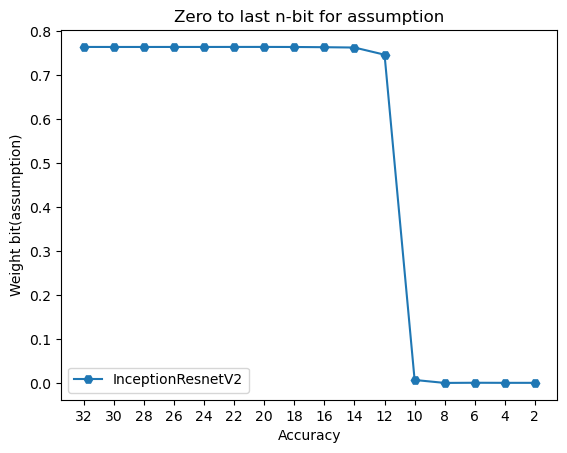

In [77]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend, accuracy_decend, marker='H')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend)

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 32~12비트까지 시각화

In [78]:
bit_decend[:11]

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12]

In [79]:
len(accuracy_decend[:11])

11

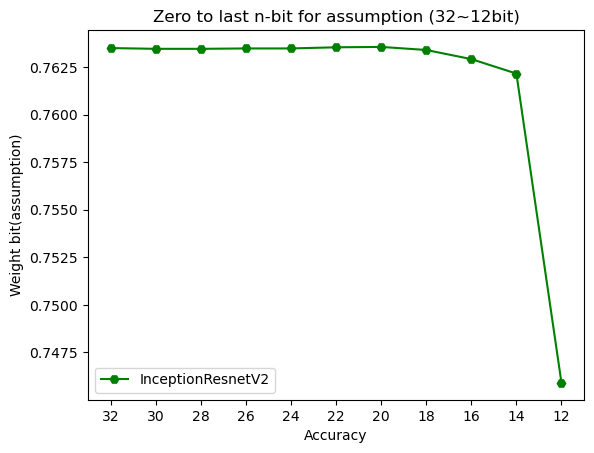

In [80]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[:11], accuracy_decend[:11], marker='H', color='green')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (32~12bit)')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[:11])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 12~2비트까지 시각화

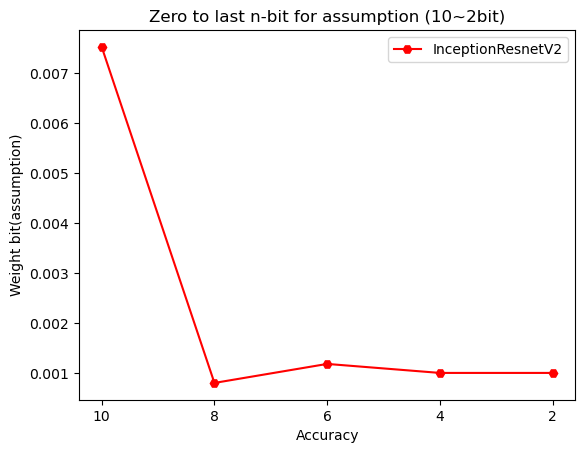

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[11:], accuracy_decend[11:], marker='H', color='red')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (10~2bit)')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[11:])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()